### Rahul Sharma

# Predicition Using Decision Tree Algorithm (Iris dataset)

In [89]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [90]:
df= pd.read_csv(r"C:\Users\Rahul\Desktop\iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [94]:
df.shape

(150, 5)

In [95]:
df.groupby(['sepal_length','sepal_width']).size()

sepal_length  sepal_width
4.3           3.0            1
4.4           2.9            1
              3.0            1
              3.2            1
4.5           2.3            1
                            ..
7.7           2.6            1
              2.8            1
              3.0            1
              3.8            1
7.9           3.8            1
Length: 116, dtype: int64

In [96]:
df.groupby(['petal_length','petal_width']).size()

petal_length  petal_width
1.0           0.2            1
1.1           0.1            1
1.2           0.2            2
1.3           0.2            4
              0.3            2
                            ..
6.4           2.0            1
6.6           2.1            1
6.7           2.0            1
              2.2            1
6.9           2.3            1
Length: 102, dtype: int64

In [97]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Pair Plotting dependent Variables

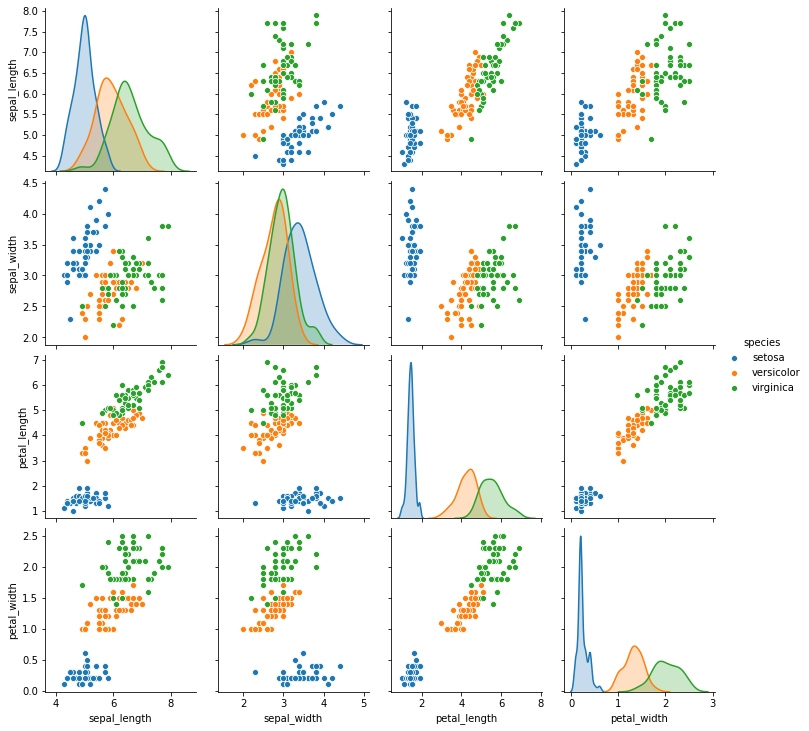

In [98]:
import seaborn as sns
sns.pairplot(df,hue='species')

## Label Encoding for Dependent variables

In [99]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['species'].unique()

array([0, 1, 2])

In [100]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Declaring Independent and dependent parameters under variables

In [101]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df[['species']]

## Creating and Splitting train and test data

In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

# Decision Tree Classification Model

In [111]:
from sklearn.tree import DecisionTreeClassifier as dt
model=dt(max_depth=10,random_state=100)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=100)

# Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test =sc.transform(x_test)
print(x_train)

[[-1.08593443  0.09813652 -1.24448561 -1.41148027]
 [ 0.2219428  -0.36672067  0.44627813  0.40699124]
 [-0.37254685 -1.06400644  0.38991934  0.01731878]
 [-1.20483236 -0.13429207 -1.3008444  -1.15169862]
 [-0.49144478  1.95756524 -1.35720319 -1.0218078 ]
 [-0.25364892 -0.59914926  0.6717133   1.05644535]
 [-0.25364892 -0.13429207  0.44627813  0.40699124]
 [-1.20483236  0.79542229 -1.01905044 -1.28158945]
 [-1.68042408 -0.36672067 -1.3008444  -1.28158945]
 [ 0.45973866 -0.59914926  0.61535451  0.79666371]
 [-1.44262822  1.26027947 -1.52627956 -1.28158945]
 [-0.84813857  1.72513665 -1.01905044 -1.0218078 ]
 [ 0.45973866 -0.36672067  0.33356055  0.1472096 ]
 [-0.9670365  -1.76129221 -0.23002736 -0.24246287]
 [-0.9670365   0.79542229 -1.18812682 -1.0218078 ]
 [ 0.69753452  0.09813652  1.00986605  0.79666371]
 [-0.49144478 -0.13429207  0.44627813  0.40699124]
 [-0.72924064  1.02785088 -1.24448561 -1.28158945]
 [ 0.34084073 -0.13429207  0.6717133   0.79666371]
 [ 0.69753452 -0.59914926  1.06

# Predicting Model

In [113]:
predictions=model.predict(x_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

# Classificatin report, Confusion Matrix

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

[[3 0 0]
 [0 8 0]
 [0 0 4]]


In [115]:
print(confusion_matrix(y_test,predictions))

[[3 0 0]
 [0 8 0]
 [0 0 4]]


# Predicting the Accuracy of the model

In [116]:
from sklearn import metrics
print('The accuracy of the DecisionTreeClassifier is:',metrics.accuracy_score(y_test,predictions))

The accuracy of the DecisionTreeClassifier is: 1.0


# Plotting Decision Tree

[Text(1395.0, 1993.2, 'X[2] <= -0.709\ngini = 0.666\nsamples = 135\nvalue = [47, 42, 46]'),
 Text(1180.3846153846155, 1630.8000000000002, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]'),
 Text(1609.6153846153845, 1630.8000000000002, 'X[3] <= 0.732\ngini = 0.499\nsamples = 88\nvalue = [0, 42, 46]'),
 Text(858.4615384615385, 1268.4, 'X[2] <= 0.7\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(429.2307692307692, 906.0, 'X[3] <= 0.602\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(214.6153846153846, 543.5999999999999, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(643.8461538461538, 543.5999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1287.6923076923076, 906.0, 'X[3] <= 0.472\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(1073.076923076923, 543.5999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(1502.3076923076924, 543.5999999999999, 'X[2] <= 0.982\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(1287.6923076923076,

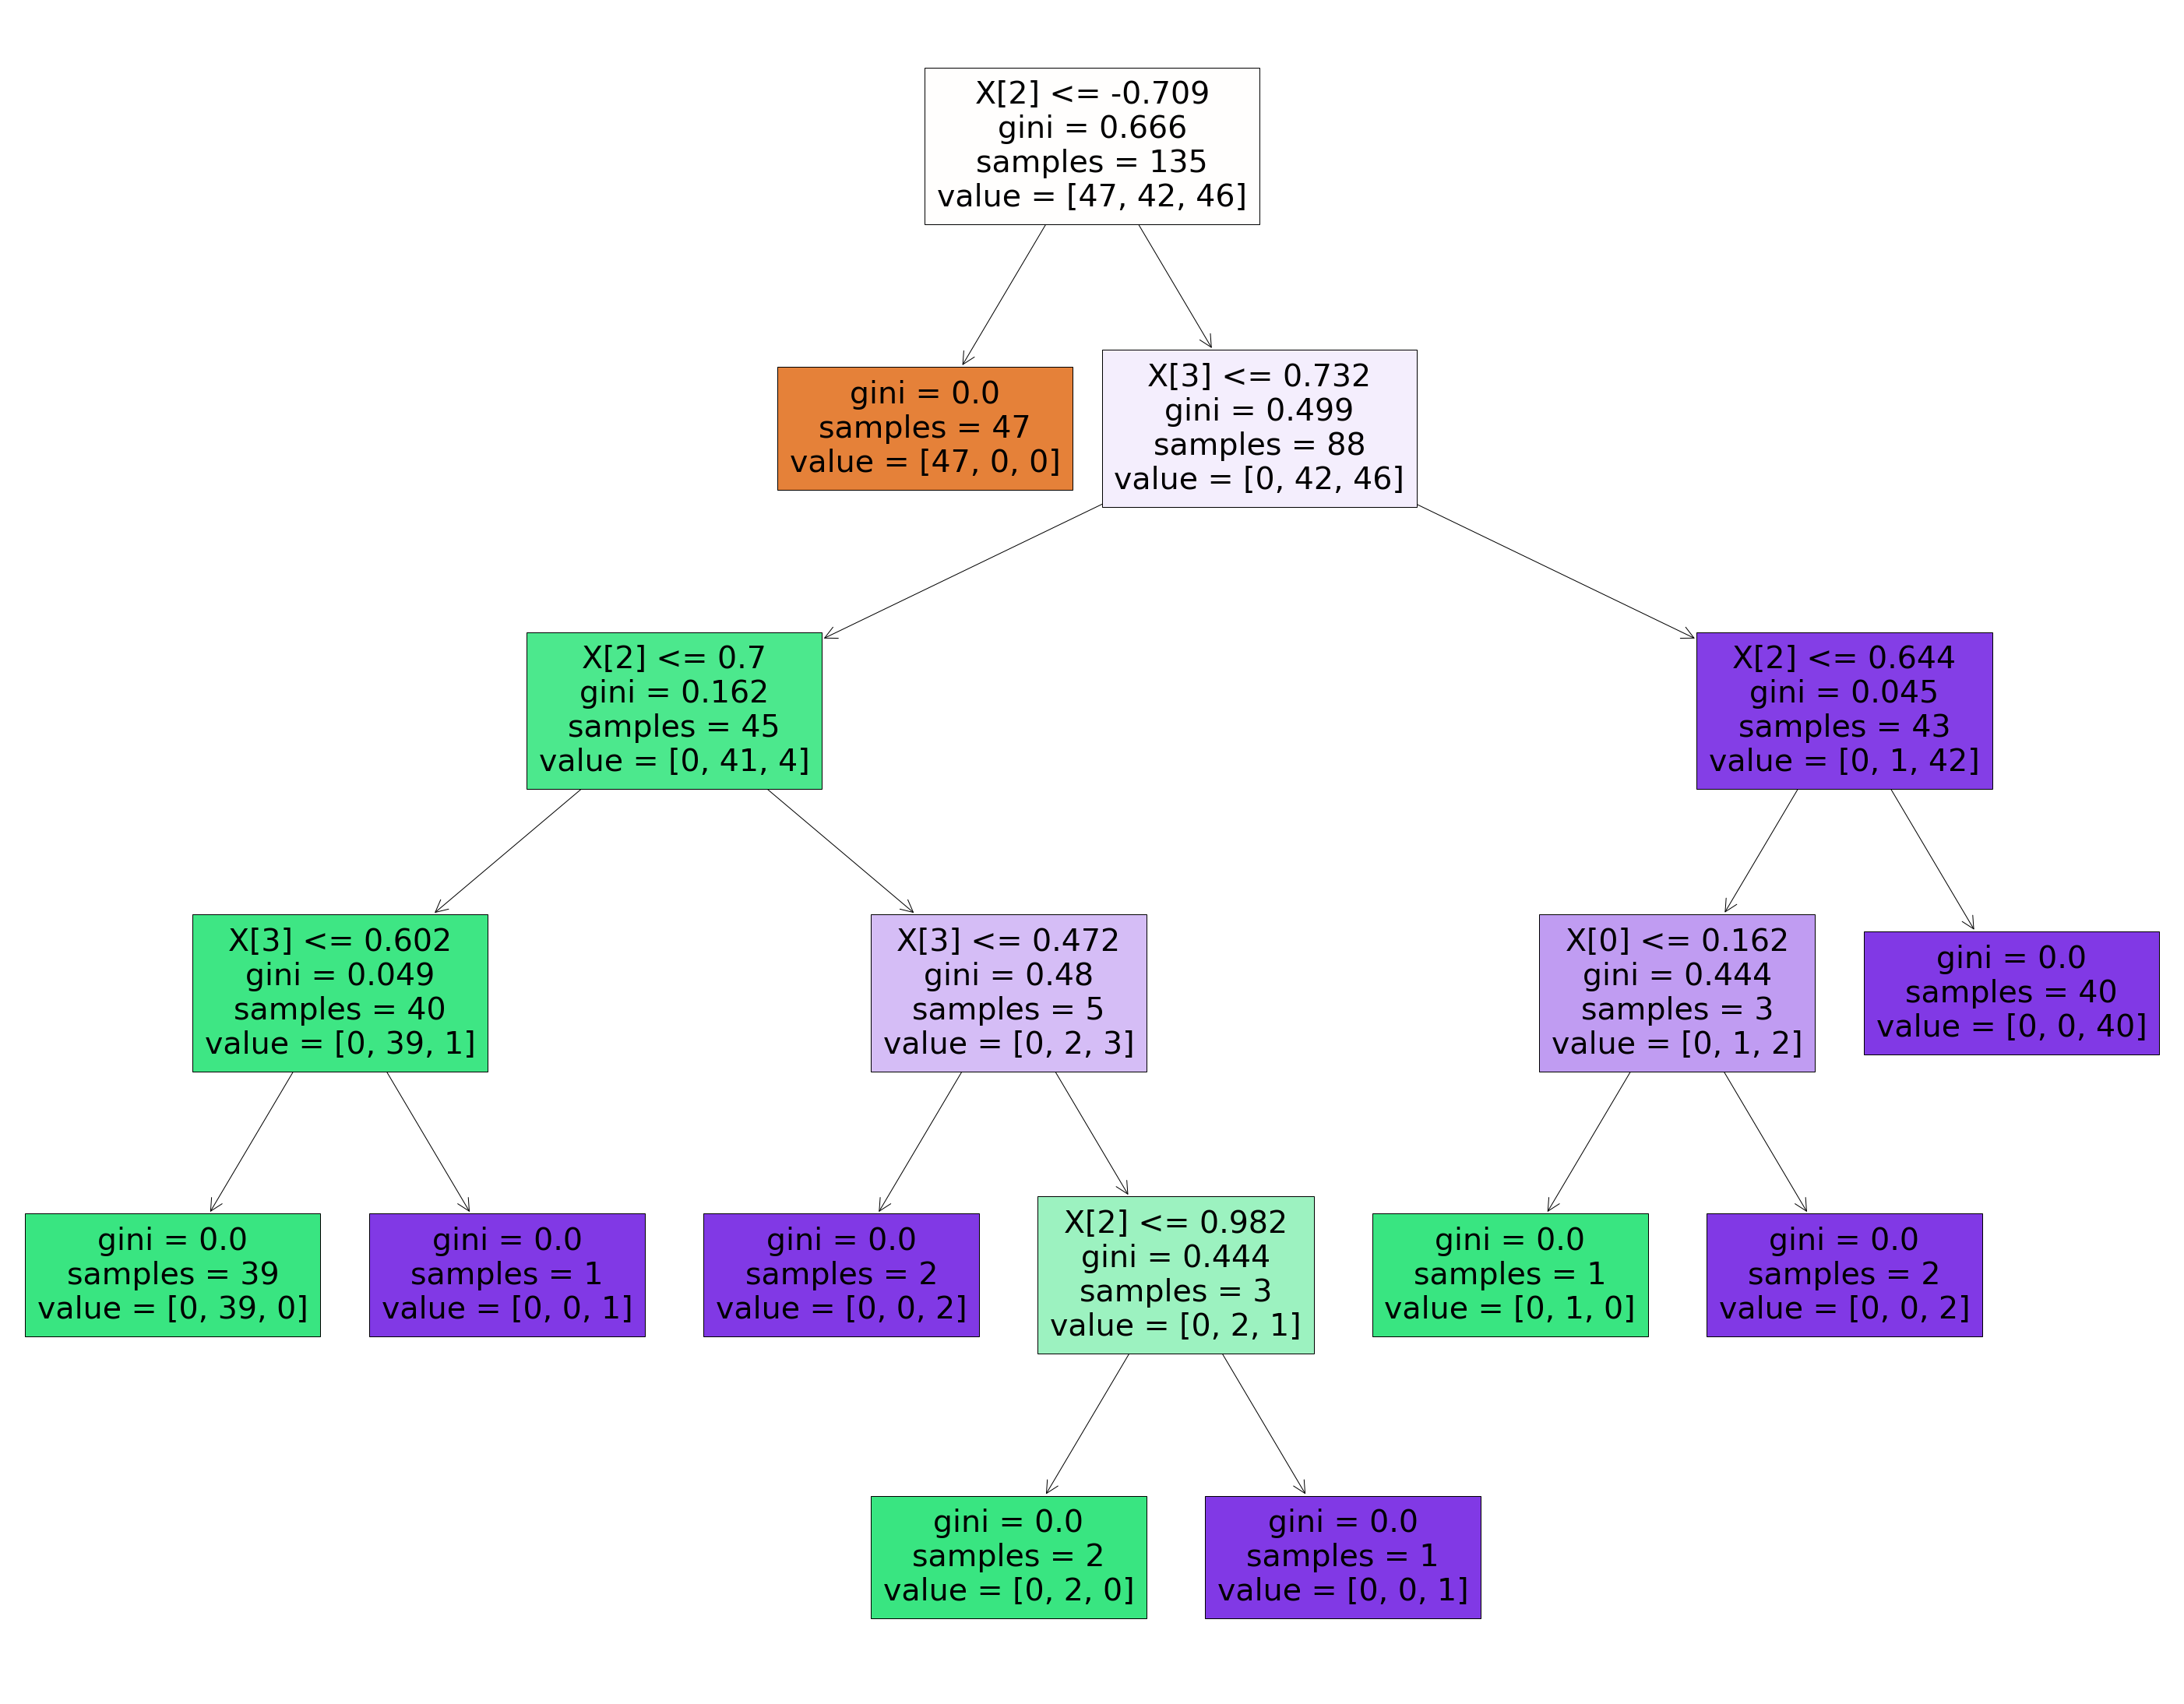

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
plot_tree(model,filled=True)

# Plotting Confusion Matrix

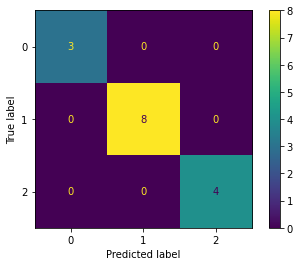

In [118]:
cfm = (metrics.plot_confusion_matrix(model,x_test,y_test))

# Thank you for checking ...!!!